### CR Attenuation, Spectra and Aab et al. 2017

This notebook is broadly speaking an attempt to reproduce the results from Aab et al, 2017: https://arxiv.org/abs/1612.07155 

A couple of key equations. The first is the modelled "$J$" or $dN/dE$, given by, for each atomic species:

$J_A = f_A~J_0~\left( \frac{E}{10^{18}} \right)^{-\gamma}~f_{\mathrm{cut}} (E, Z_A R_{\mathrm{cut}})$

where $A$ denotes the atomic nucleus, $E$ the energy in eV, $J_0$ the normalisation, and the cutoff function is

$f_{\mathrm{cut}} = \exp (1- \frac{E}{Z_A R_{\mathrm{cut}}})$ for $E>Z_A R_{\mathrm{cut}}$, and $f_{\mathrm{cut}}=1$ otherwise. 

Let's begin by importing some modules.

In [ ]:
from crpropa import *
import pylab as pl
import numpy as np 
from aab_subroutines import * 
import matplotlib.pyplot as plt
%matplotlib inline
import sys
print sys.executable

Now we can define the equations as above and some plotting functions that we'll use later

In [2]:
def plot_auger_data():
    logE, n, dn1, dn2 = np.loadtxt("auger.dat", unpack=True)

    # convert from m^{-2} / s to km^{-2} yr^{-1}
    conversion = 1e6 * 3.154e+7 * 1
    Elinear = 10.0**logE
    y = Elinear**2 * n * conversion
    yerr1 = Elinear**2*dn1 * conversion
    yerr2 = Elinear**2*dn2 * conversion
    #y = n / Elinear
    #yerr1 = dn1 / Elinear / y[4]
    #yerr2 = dn2 / Elinear / y[4]
    pl.errorbar(logE, y, yerr=(yerr1, yerr2), fmt="o", label="PAO data", c="k")
    pl.semilogy()
    
    return (Elinear, y)

def add_composition_run(sim, source, Zs, mass, names, fracs, gamma, rcut, num=1e4):
    composition = SourceComposition(1 * EeV, (rcut/1e18) * EeV, gamma)
    
    for i in range(len(Zs)):
        composition.add(mass[i], Zs[i],  fracs[i]/mass[i])  # H
    source.add( composition )
    
    # run simulation
    sim.setShowProgress(True)
    sim.run(source, int(num), True)

Now we set up the actual simulation. We follow Aab et al. by using H, He, N, Si and Fe nuclei. We set the abundances of these elements according to their values in table 1 of the paper and set the luminosity weights accordingly too. 

In [3]:
Zs = [1,2,7,14,26]
mass = [1,4,14,28,56]
names = ["H", "He", "N", "Si", "Fe"]
#fracs = [0.125,0.586,0.246,0.042,0.0]
fracs = [0.064, 0.467, 0.375, 0.094, 0.0]
rcut = 10.0**18.66
gamma = 0.93

# rcut = 10.0**20.51
# gamma = 0.96

weights = [1.0, 0.328, 0.504, 0.168, 0.0]
weights = np.array([fracs[i]*(Zs[i]**(2.0-gamma)) for i in range(len(fracs))])
weights /= np.sum(weights)
print (weights)

fname = "modela.txt"
sim, source, output = setup_sim(fname, maxdistance=1000)
add_composition_run(sim, source, Zs, mass, names, fracs, 1, 1e20, num=1e5)
output.close()

[0.01135656 0.17397464 0.53376874 0.28090005 0.        ]


aab_subroutines.py:43: RuntimeWarning: invalid value encountered in divide
  pl.plot(E, J / J[0], label=names[i])
aab_subroutines.py:240: RuntimeWarning: divide by zero encountered in double_scalars
  return np.exp(1.0 - E/Z/R_cut)


(5e+35, 1e+38)

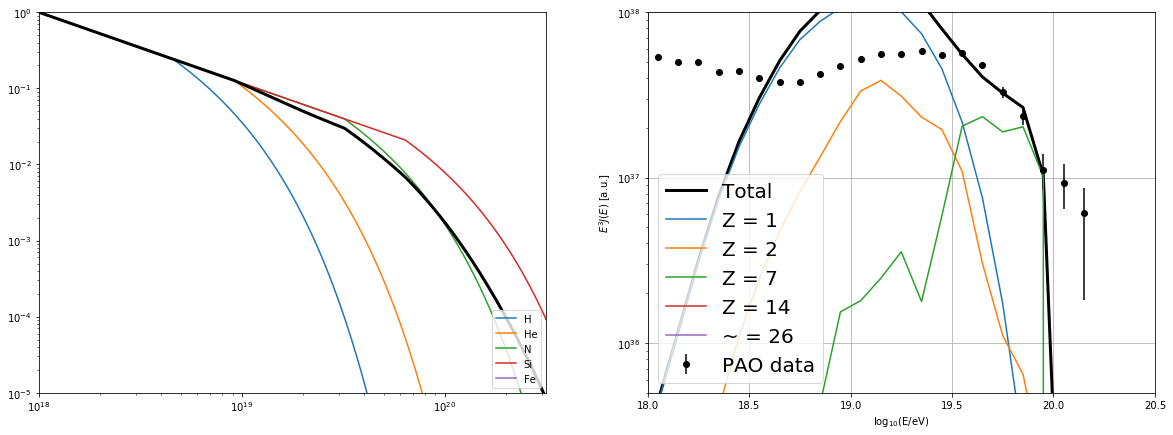

In [4]:
pl.figure(figsize=(20,7))
pl.subplot(121)
make_plot_input(Zs, names, fracs, gamma, rcut, weights)

pl.subplot(122)
Elinear, y = plot_auger_data()

make_plot_observed2(fname, bins="auger", norm=None, rcut=rcut, gamma=gamma, y=y)
#pl.ylim(5e35,1e40)
pl.xlim(18,20.5)
pl.ylim(5e35,1e38)

**Caption:** Plot showing the input spectrum (left) and observed spectrum (right) for an isotropic distribution of sources as described in Aab et al. 2017. Compare to: ![](uhecr_spec1.png)

Next, we do the same but for the other model with $\gamma=2.05$.

In [ ]:
mysum2 = 0.0
Zs2 = [1,2,7,14,26]
names2 = ["H", "He", "N", "Si", "Fe"]
fracs2 = [0.0, 0.0, 0.798, 0.202, 0.0]
rcut2 = 10.0**19.88
gamma2 = 2.04

fname = "modelb.txt"
sim, source, output = setup_sim(fname, maxdistance=1000)
add_composition_run(sim, source, Zs2, mass, names2, fracs2, 1, 1e21, num=1e5)
output.close()

In [ ]:
pl.figure(figsize=(20,7))
pl.subplot(121)
make_plot_input(Zs2, names2, fracs2, gamma2, rcut2, weights)

pl.subplot(122)
Elinear, y = plot_auger_data()
make_plot_observed2(fname, bins="auger", norm=None, rcut=rcut, gamma=gamma, y=y)
#pl.ylim(5e35,1e40)
pl.xlim(18,20.5)
pl.ylim(5e35,1e38)
#pl.ylim(5e35,1e38)

Compare to: ![](uhecr_spec2.png)